In [2]:
print("aa")

aa


In [3]:
import sys
sys.path.append('/home/dylan-kmutt/ubpd')

In [4]:
from src.helper import get_train_test_pids

train_v_pids, test_pids = get_train_test_pids("../../data/dataset/images/", seed=42)
all_pids = train_v_pids + test_pids
len(all_pids)

88

In [40]:
print(all_pids)

[69, 75, 36, 32, 20, 28, 51, 81, 16, 78, 47, 2, 89, 70, 66, 40, 79, 39, 62, 50, 86, 21, 98, 9, 44, 93, 43, 68, 35, 65, 42, 131, 48, 90, 13, 24, 19, 83, 60, 58, 8, 37, 84, 3, 17, 41, 52, 23, 71, 25, 6, 7, 77, 73, 94, 10, 166, 22, 85, 49, 11, 61, 53, 1, 99, 67, 97, 63, 27, 87, 76, 31, 29, 92, 100, 5, 64, 88, 12, 82, 14, 18, 30, 34, 38, 4, 15, 96]


In [5]:
from typing import List, Tuple
import random
import math

def split_train_and_test(pids: List[int], seed: int = 42) -> Tuple[List[int], List[int]]:
    if not pids:
        return [], []

    # De-duplicate while preserving order
    unique = list(dict.fromkeys(pids))
    n = len(unique)

    # Reproducible shuffle
    rng = random.Random(seed)
    idxs = list(range(n))
    rng.shuffle(idxs)
    shuffled = [unique[i] for i in idxs]

    # Compute test size (≈15%); keep at least 1 test if possible, and at least 1 train
    raw_test = int(round(n * 0.15))
    if n >= 2:
        test_size = max(1, min(raw_test, n - 1))
    else:
        test_size = 0  # only one item → all train

    test_ids = shuffled[:test_size]
    train_ids = shuffled[test_size:]

    return train_ids, test_ids


In [6]:
ultrasound_1_pids = [i for i in range(7, 44+1) if i in all_pids]

sub_1_ultrasound_2_pids = [i for i in range(47, 166+1) if i in all_pids]
sub_2_ultrasound_2_pids = [i for i in range(1, 6+1) if i in all_pids]
ultrasound_2_pids = sub_1_ultrasound_2_pids + sub_2_ultrasound_2_pids

print(f"# Patients in Ultrasound 1: {len(ultrasound_1_pids)}")
print(f"# Patients in Ultrasound 2: {len(ultrasound_2_pids)}")

# Patients in Ultrasound 1: 36
# Patients in Ultrasound 2: 52


In [13]:
seed = 94
u1_train_pids, u1_test_pids = split_train_and_test(ultrasound_1_pids, seed=seed)
u2_train_pids, u2_test_pids = split_train_and_test(ultrasound_2_pids, seed=seed)

# Combine (concat) and deduplicate while keeping order
comb_train_pids = list(dict.fromkeys(list(u1_train_pids) + list(u2_train_pids)))
comb_test_pids  = list(dict.fromkeys(list(u1_test_pids)  + list(u2_test_pids)))

# Optional: ensure no leakage between train/test
leak = set(comb_train_pids) & set(comb_test_pids)
if leak:
    comb_train_pids = [p for p in comb_train_pids if p not in leak]
    print("leak")
    # or raise an error/log, depending on your policy

print(f"Seed: {seed}\n")
print(f"Ultrasound 1: train {len(u1_train_pids)} pids, test {len(u1_test_pids)} pids")
print(f"  Train PIDs: {', '.join(map(str, u1_train_pids))}")
print(f"  Test  PIDs: {', '.join(map(str, u1_test_pids))}\n")

print(f"Ultrasound 2: train {len(u2_train_pids)} pids, test {len(u2_test_pids)} pids")
print(f"  Train PIDs: {', '.join(map(str, u2_train_pids))}")
print(f"  Test  PIDs: {', '.join(map(str, u2_test_pids))}\n")

print(f"Combined: train {len(comb_train_pids)} pids, test {len(comb_test_pids)} pids")
print(f"  Train PIDs: {', '.join(map(str, comb_train_pids))}")
print(f"  Test  PIDs: {', '.join(map(str, comb_test_pids))}")

Seed: 94

Ultrasound 1: train 31 pids, test 5 pids
  Train PIDs: 19, 38, 23, 13, 28, 17, 10, 12, 42, 21, 34, 25, 30, 31, 37, 41, 15, 40, 39, 16, 44, 22, 29, 7, 36, 20, 27, 24, 14, 18, 43
  Test  PIDs: 11, 35, 32, 9, 8

Ultrasound 2: train 44 pids, test 8 pids
  Train PIDs: 93, 85, 83, 88, 64, 131, 78, 87, 67, 61, 49, 51, 60, 52, 73, 66, 65, 92, 99, 75, 53, 79, 5, 84, 76, 90, 47, 97, 166, 6, 3, 94, 1, 2, 77, 86, 100, 48, 82, 71, 69, 58, 63, 89
  Test  PIDs: 50, 62, 98, 4, 81, 96, 70, 68

Combined: train 75 pids, test 13 pids
  Train PIDs: 19, 38, 23, 13, 28, 17, 10, 12, 42, 21, 34, 25, 30, 31, 37, 41, 15, 40, 39, 16, 44, 22, 29, 7, 36, 20, 27, 24, 14, 18, 43, 93, 85, 83, 88, 64, 131, 78, 87, 67, 61, 49, 51, 60, 52, 73, 66, 65, 92, 99, 75, 53, 79, 5, 84, 76, 90, 47, 97, 166, 6, 3, 94, 1, 2, 77, 86, 100, 48, 82, 71, 69, 58, 63, 89
  Test  PIDs: 11, 35, 32, 9, 8, 50, 62, 98, 4, 81, 96, 70, 68


In [30]:
def report_leak(tag, train_ids, test_ids):
    leak = set(train_ids) & set(test_ids)
    if leak:
        print(f"[LEAK] {tag}: {len(leak)} overlapping PID(s): {', '.join(map(str, sorted(leak)))}")
    else:
        print(f"[OK]   {tag}: no leakage.")

# Per-dataset leakage
report_leak("Ultrasound 1", u1_train_pids, u1_test_pids)
report_leak("Ultrasound 2", u2_train_pids, u2_test_pids)

# Cross-dataset leakage (train of one vs test of the other)
report_leak("U1 train vs U2 test", u1_train_pids, u2_test_pids)
report_leak("U2 train vs U1 test", u2_train_pids, u1_test_pids)

# Combined leakage
report_leak("Combined", comb_train_pids, comb_test_pids)

[OK]   Ultrasound 1: no leakage.
[OK]   Ultrasound 2: no leakage.
[OK]   U1 train vs U2 test: no leakage.
[OK]   U2 train vs U1 test: no leakage.
[OK]   Combined: no leakage.


In [20]:
from src.helper import get_cv_pids

u1_cv_pids = get_cv_pids(u1_train_pids, cv=5)
u2_cv_pids = get_cv_pids(u2_train_pids, cv=5)

In [21]:
assert len(u1_cv_pids) == len(u2_cv_pids), "U1 and U2 must have the same # of folds"

comb_cv_pids: list[tuple[list[int], list[int]]] = []
for (u1_tr, u1_val), (u2_tr, u2_val) in zip(u1_cv_pids, u2_cv_pids):
    # concat + dedup while keeping order
    comb_tr  = list(dict.fromkeys(list(u1_tr)  + list(u2_tr)))
    comb_val = list(dict.fromkeys(list(u1_val) + list(u2_val)))

    # optional: sanity check for leakage within the fold
    leak = set(comb_tr) & set(comb_val)
    if leak:
        print(f"[LEAK] Combined fold has overlap: {sorted(leak)}")

    comb_cv_pids.append((comb_tr, comb_val))


In [22]:
def print_cv(name: str, cv_pids: list[tuple[list[int], list[int]]]) -> None:
    print(f"{name}: {len(cv_pids)} folds")
    for i, (train, val) in enumerate(cv_pids, start=1):
        print(f" Fold {i}: train {len(train)} pids, val {len(val)} pids")
        print(f"   Train: {', '.join(map(str, train))}")
        print(f"   Val  : {', '.join(map(str, val))}")
        leak = set(train) & set(val)
        if leak:
            print(f"   [LEAK] {len(leak)} overlapping PID(s): {', '.join(map(str, sorted(leak)))}")
    print()

print_cv("Ultrasound 1 (CV)", u1_cv_pids)
print_cv("Ultrasound 2 (CV)", u2_cv_pids)
print_cv("Combined (CV)", comb_cv_pids)


Ultrasound 1 (CV): 5 folds
 Fold 1: train 25 pids, val 6 pids
   Train: 17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44
   Val  : 16, 37, 34, 36, 24, 10
 Fold 2: train 25 pids, val 6 pids
   Train: 16, 37, 34, 36, 24, 10, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44
   Val  : 17, 30, 25, 41, 21, 27
 Fold 3: train 25 pids, val 6 pids
   Train: 16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44
   Val  : 43, 29, 15, 14, 38, 31
 Fold 4: train 25 pids, val 6 pids
   Train: 16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 20, 12, 42, 7, 19, 13, 44
   Val  : 39, 23, 40, 22, 18, 28
 Fold 5: train 24 pids, val 7 pids
   Train: 16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28
   Val  : 20, 12, 42, 7, 19, 13, 44

Ultrasound 2 (CV): 5 folds
 Fold 1: train 36 pids, val 8 pids
   Train: 64, 86, 84, 51, 3, 7

In [ ]:
def get_pids(seed, ultrasound):
    if seed == 42:
        if ultrasound == "u1":
            p_ids = [16, 19, 12, 36, 41]
        if ultrasound == "u2":
            p_ids = [61, 77, 79, 50, 75, 94, 68, 96]
        if ultrasound == "combined":
            p_ids = [16, 19, 12, 36, 41, 61, 77, 79, 50, 75, 94, 68, 96]
    elif seed == 94:
        if ultrasound == "u1":
            p_ids = [11, 35, 32, 9, 8]
        if ultrasound == "u2":
            p_ids = [50, 62, 98, 4, 81, 96, 70, 68]
        if ultrasound == "combined":
            p_ids = [11, 35, 32, 9, 8, 50, 62, 98, 4, 81, 96, 70, 68]
    elif seed == 33:
        if ultrasound == "u1":
            p_ids = [38, 19, 10, 42, 8]
        if ultrasound == "u2":
            p_ids = [131, 53, 6, 47, 78, 49, 76, 64]
        if ultrasound == "combined":
            p_ids = [38, 19, 10, 42, 8, 131, 53, 6, 47, 78, 49, 76, 64]
    return p_ids

In [26]:
import numpy as np
import os
import wandb

from src.dataset import UBPDataset
from src.preprocessing import PairedTransform
from src.dataset import UBPDataset
from src.preprocessing import PairedTransform
from src.train import Trainer
from src.evaluate import Evaluator
from src.helper import (
    set_seed,
    _build_model_factory,
    aggregate_fold_metrics,
)

def experiment(variants, exp_id, seed):
    # CV
    exp_id = str(exp_id)
    all_histories = []
    fold_overall_means = []
    fold_results = []  # store per-fold evaluator outputs (dicts)

    # exp_id = random.randint(int(1e5), int(1e6) - 1)
    model_name = variants["model"]

    set_seed(seed)
    print(f"\n🚀 Beginning experiment #{exp_id}")
    print("=" * 60)

    include_classes = variants.get("include_classes")
    class_names = {
        1: "dongmai (artery)",
        2: "jingmai (vein)",
        3: "jirouzuzhi (muscle)",
        4: "shenjing (nerve)",
    }
    print("Included classes:")
    for cid in include_classes:
        print(f"  {cid}: {class_names.get(cid, 'unknown')}")
    print(f"\n- Model: {model_name}")
    print(f"- Augment: {variants['augment']}")

    include_classes = variants["include_classes"]
    n_inc = len(include_classes)
    if n_inc == 1:
        variants["loss"] = "bce"
        num_classes_for_model = 1  # single foreground channel
        keep_original_indices = True  # irrelevant when binary
    else:
        variants["loss"] = "ce"
        num_classes_for_model = n_inc + 1  # background + selected classes only
        keep_original_indices = False  # remap selected IDs to contiguous {0..K}
    variants["num_classes"] = num_classes_for_model

    print(
        f"- Using loss='{variants['loss']}' with model num_classes={num_classes_for_model}"
    )
    if not keep_original_indices:
        print(
            "- Remapping labels to contiguous IDs: background=0, selected classes=1..K"
        )
    print(f"- Image size: {variants['image_size']}")
    print("-" * 60)

    if variants["dataset"] == "u1":
        test_pids = u1_test_pids
        cv_pids = u1_cv_pids
    if variants["dataset"] == "u2":
        test_pids = u2_test_pids
        cv_pids = u2_cv_pids
    if variants["dataset"] == "comb":
        test_pids = comb_test_pids
        cv_pids = comb_cv_pids

    paired_train_tf = PairedTransform(size=variants["image_size"], aug=variants["augment"])
    paired_test_tf = PairedTransform(size=variants["image_size"], aug=False)
    test_dataset = UBPDataset(
        p_ids=test_pids,
        include_classes=include_classes,
        image_dir="../../data/dataset/images",
        json_dir="../../data/dataset/labels/json_train",
        joint_transform=paired_test_tf,
        keep_original_indices=True,
    )

    print("Test landmarks stat: ")
    test_dataset.print_stats()
    len(test_dataset)

    for fold in range(1, len(cv_pids)+1):
        name = f"{exp_id}_fold_{fold}"
        if variants["use_wandb"]:
            api_key = os.getenv("WANDB_API_KEY")
            wandb.login(key=api_key)
            wandb.init(
                project="ubpd",
                group=exp_id,
                name=name,
                config=variants,
                reinit=True,
            )
        train_pids, val_pids = cv_pids[fold-1]

        print(f"\n📂 Fold {fold}/{len(cv_pids)}")
        print(f"  Train patient IDs: {train_pids}")
        print(f"  Val   patient IDs: {val_pids}\n")

        train_dataset = UBPDataset(
            p_ids=train_pids,
            include_classes=include_classes,
            image_dir="../../data/dataset/images",
            json_dir="../../data/dataset/labels/json_train",
            joint_transform=paired_train_tf,
            keep_original_indices=keep_original_indices,  # <--- important
        )

        val_dataset = UBPDataset(
            p_ids=val_pids,
            include_classes=include_classes,
            image_dir="../../data/dataset/images",
            json_dir="../../data/dataset/labels/json_train",
            joint_transform=paired_test_tf,
            keep_original_indices=keep_original_indices,  # <--- important
        )

        print("Train landmarks stat: ")
        train_dataset.print_stats()
        print()
        print("Validation landmarks stat:")
        val_dataset.print_stats()
        val_dataset.visualize_image_transform(0)

        make_model = _build_model_factory(model_name)
        model = make_model(num_classes=num_classes_for_model)

        trainer = Trainer(
            exp_id=exp_id,
            fold_num=fold,
            model=model,
            train_dataset=train_dataset,
            val_dataset=val_dataset,
            arguments=variants,
        )
        history = trainer.train()
        all_histories.append(history)

        if history["val_loss"]:
            best_idx = int(np.argmin(history["val_loss"]))
            print(
                f"  ✅ Best @ epoch {best_idx+1}: val_loss={history['val_loss'][best_idx]:.4f} | val_dice={history['val_dice'][best_idx]:.4f}"
            )
        print("-" * 60)

        # Evaluate one fold (you can move this after the loop to evaluate the final/best model instead)
        evaluator = Evaluator(
            trainer.model,
            test_dataset,
            num_classes=num_classes_for_model,
            ignore_empty_classes=False,
        )
        res = evaluator.evaluate_dice_score(show_plot=True)
        evaluator.visualize_ranked()
                # collect overall mean dice for this fold if available
        try:
            overall_mean = res.get("overall", {}).get("mean", float("nan"))
        except Exception:
            overall_mean = float("nan")
        fold_overall_means.append(
            float(overall_mean) if overall_mean is not None else float("nan")
        )
        fold_results.append(res)

    overall_mean, overall_std, per_class_stats = aggregate_fold_metrics(fold_results)
    if not np.isnan(overall_mean):
        print(
            f"\n🎯 Average overall Dice across folds: {overall_mean:.4f} ± {overall_std:.4f}  (n={len(fold_results)})"
        )
    else:
        print("\n⚠️ No per-fold overall Dice scores collected.")

    # Print per-landmark (per-class) averages
    if per_class_stats:
        print("\n📌 Per-landmark average Dice across folds:")
        for cid in sorted(per_class_stats.keys()):
            stats = per_class_stats[cid]
            name = class_names.get(cid, f"class_{cid}")
            print(
                f"  {cid}: {name:<20s} mean±std: {stats['mean']:.4f} ± {stats['std']:.4f}  (folds={stats['n_folds']})"
            )
    else:
        print("\n⚠️ No per-class stats available to aggregate.")

    print("\n✅ Experiment complete across folds.")

    if variants["use_wandb"]:
        wandb.finish()
        
    return {
        "histories": all_histories,
        "test_dataset": test_dataset,
        "fold_overall_means": fold_overall_means,
    }


In [37]:
import torch

variants = {
    "model": "unet",
    "cv": 5,
    "include_classes": [1,2,3,4],
    "dataset": "u1",

    "epochs": 100,
    "batch_size": 16,
    "num_workers": 2,
    "image_size": 512,
    
    "patience": 20,
    "scheduler": "plateau",
    "plateau_cooldown": 10,
    
    "half_precision": True,
    "ignore_empty": False,
    "augment": True,
    "cuda": "cuda" if torch.cuda.is_available() else "cpu",
    "use_wandb": False,
    "save_dir": "../../checkpoints_2"
}


🚀 Beginning experiment #101114
Included classes:
  1: dongmai (artery)
  2: jingmai (vein)
  3: jirouzuzhi (muscle)
  4: shenjing (nerve)

- Model: unet
- Augment: True
- Using loss='ce' with model num_classes=5
- Remapping labels to contiguous IDs: background=0, selected classes=1..K
- Image size: 512
------------------------------------------------------------
Test landmarks stat: 
Artery  present: 38/49 images
Vein    present: 36/49 images
Muscle  present: 37/49 images
Nerve   present: 46/49 images

📂 Fold 1/5
  Train patient IDs: [17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44]
  Val   patient IDs: [16, 37, 34, 36, 24, 10]

Train landmarks stat: 
Artery  present: 162/257 images
Vein    present: 183/257 images
Muscle  present: 254/257 images
Nerve   present: 234/257 images

Validation landmarks stat:
Artery  present: 46/55 images
Vein    present: 42/55 images
Muscle  present: 45/55 images
Nerve   present: 50/55 images


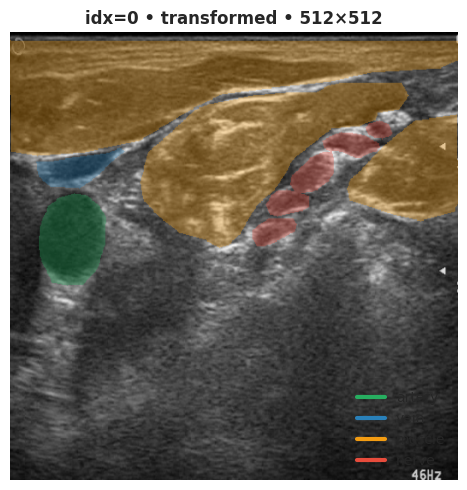

Epoch 001/100 | lr=1.000e-03 train_loss=1.3324 val_loss=1.0295 train_dice=0.1191 val_dice=0.0208 [BEST] (patience 0/20)
Epoch 002/100 | lr=1.000e-03 train_loss=0.7613 val_loss=1.0680 train_dice=0.1511 val_dice=0.0233  (patience 1/20)
Epoch 003/100 | lr=1.000e-03 train_loss=0.6655 val_loss=0.5963 train_dice=0.1893 val_dice=0.0743 [BEST] (patience 0/20)
Epoch 004/100 | lr=1.000e-03 train_loss=0.5715 val_loss=0.5496 train_dice=0.2224 val_dice=0.0394 [BEST] (patience 0/20)
Epoch 005/100 | lr=1.000e-03 train_loss=0.5097 val_loss=0.5478 train_dice=0.2583 val_dice=0.1019 [BEST] (patience 0/20)
Epoch 006/100 | lr=1.000e-03 train_loss=0.4667 val_loss=0.4841 train_dice=0.2518 val_dice=0.0305 [BEST] (patience 0/20)
Epoch 007/100 | lr=1.000e-03 train_loss=0.4446 val_loss=0.4986 train_dice=0.2831 val_dice=0.1799  (patience 1/20)
Epoch 008/100 | lr=1.000e-03 train_loss=0.4124 val_loss=0.4041 train_dice=0.3129 val_dice=0.1358 [BEST] (patience 0/20)
Epoch 009/100 | lr=1.000e-03 train_loss=0.3987 val_l

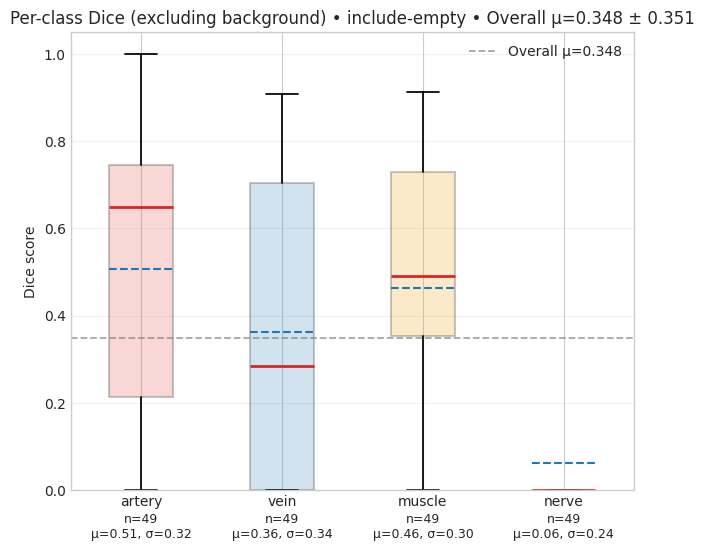

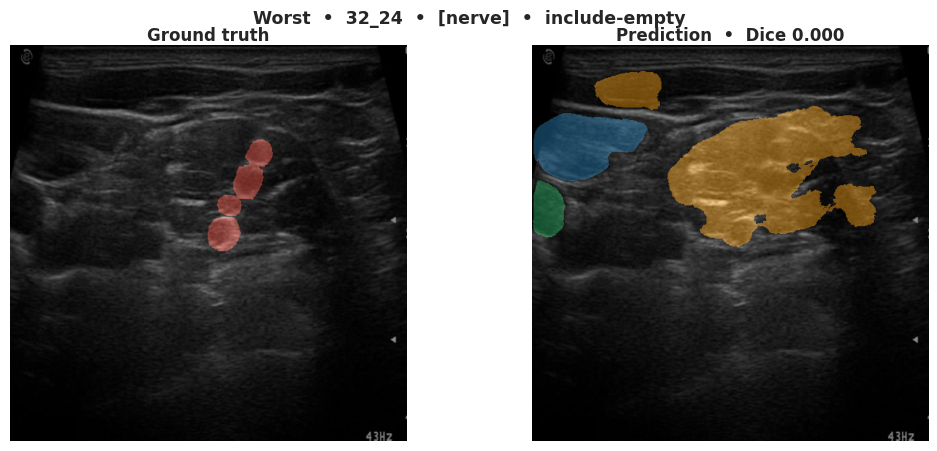

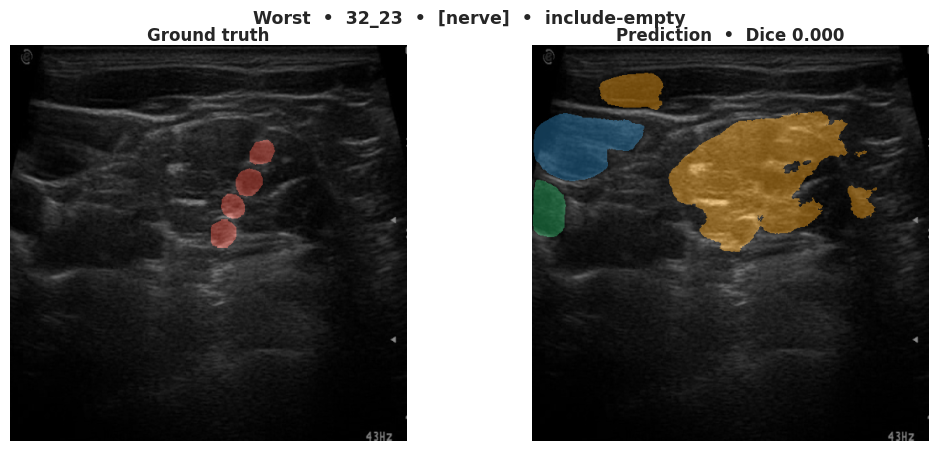

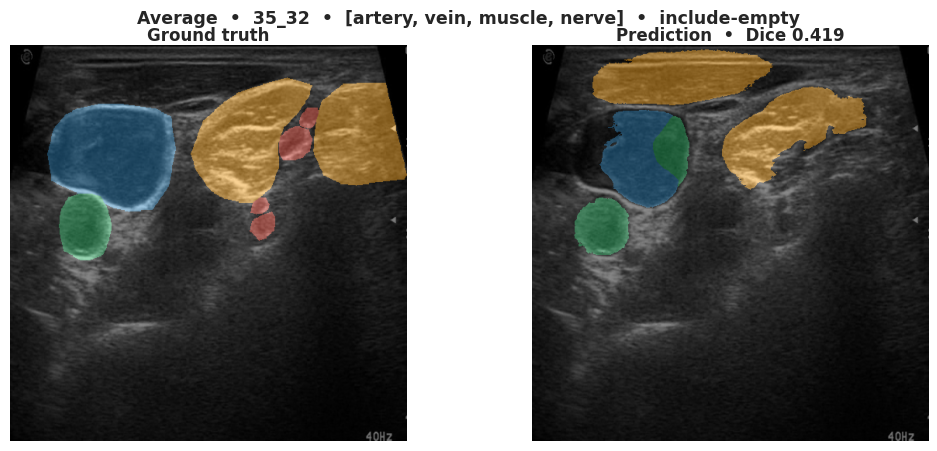

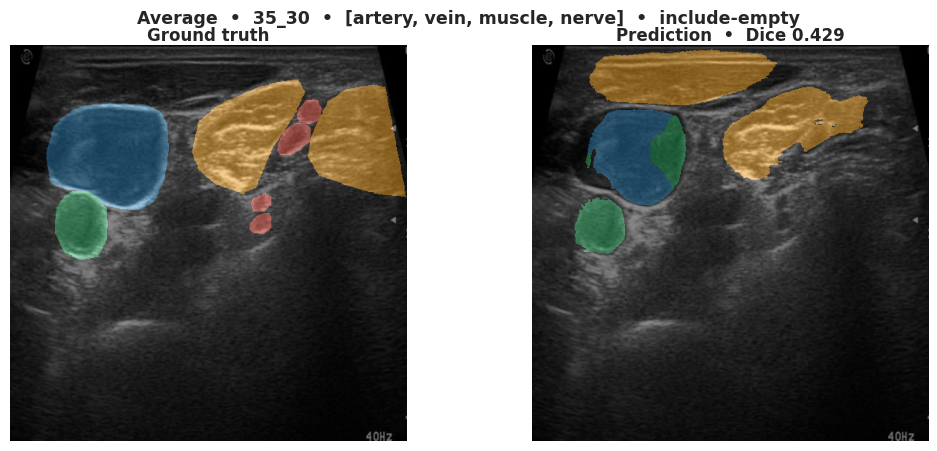

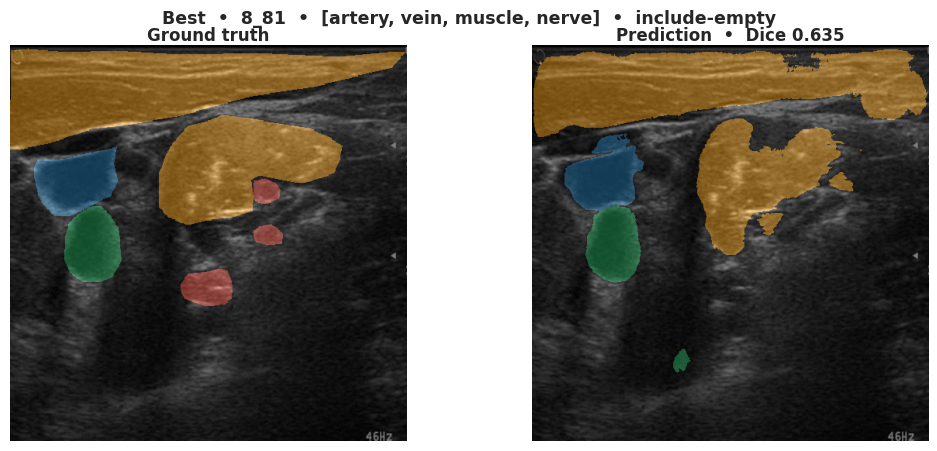

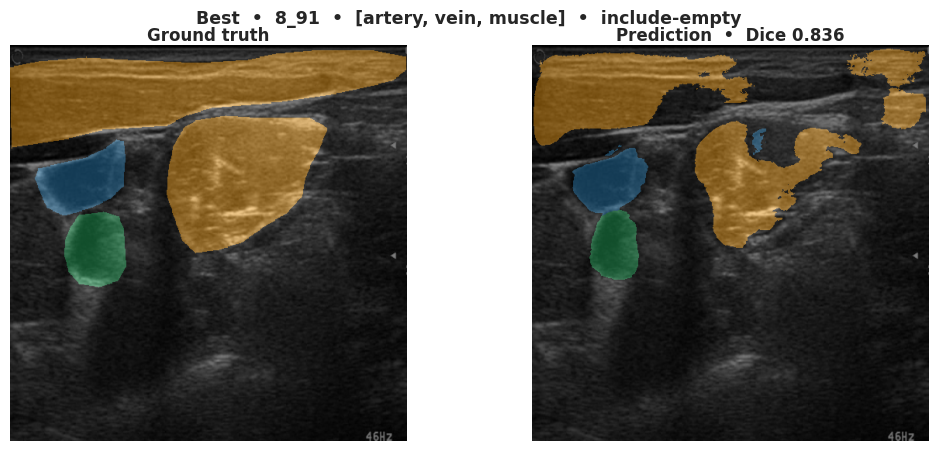


📂 Fold 2/5
  Train patient IDs: [16, 37, 34, 36, 24, 10, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44]
  Val   patient IDs: [17, 30, 25, 41, 21, 27]

Train landmarks stat: 
Artery  present: 176/252 images
Vein    present: 196/252 images
Muscle  present: 241/252 images
Nerve   present: 230/252 images

Validation landmarks stat:
Artery  present: 32/60 images
Vein    present: 29/60 images
Muscle  present: 58/60 images
Nerve   present: 54/60 images


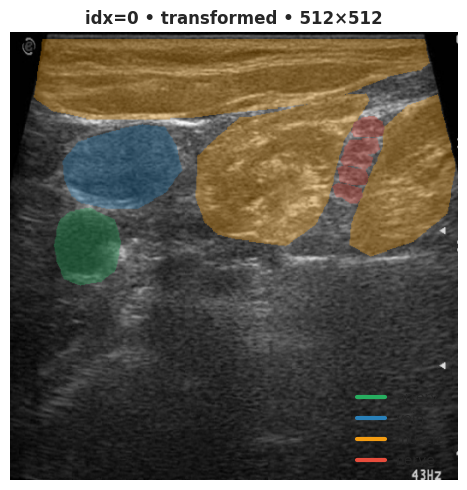

Epoch 001/100 | lr=1.000e-03 train_loss=0.9650 val_loss=1.5743 train_dice=0.1188 val_dice=0.1431 [BEST] (patience 0/20)
Epoch 002/100 | lr=1.000e-03 train_loss=0.5958 val_loss=0.7039 train_dice=0.2013 val_dice=0.2853 [BEST] (patience 0/20)
Epoch 003/100 | lr=1.000e-03 train_loss=0.5010 val_loss=0.5132 train_dice=0.2258 val_dice=0.3212 [BEST] (patience 0/20)
Epoch 004/100 | lr=1.000e-03 train_loss=0.4397 val_loss=0.5006 train_dice=0.2405 val_dice=0.2022 [BEST] (patience 0/20)
Epoch 005/100 | lr=1.000e-03 train_loss=0.4058 val_loss=0.4983 train_dice=0.2724 val_dice=0.2338 [BEST] (patience 0/20)
Epoch 006/100 | lr=1.000e-03 train_loss=0.3677 val_loss=0.4853 train_dice=0.3209 val_dice=0.2739 [BEST] (patience 0/20)
Epoch 007/100 | lr=1.000e-03 train_loss=0.3451 val_loss=0.4358 train_dice=0.3341 val_dice=0.3008 [BEST] (patience 0/20)
Epoch 008/100 | lr=1.000e-03 train_loss=0.3320 val_loss=0.5009 train_dice=0.3354 val_dice=0.2887  (patience 1/20)
Epoch 009/100 | lr=1.000e-03 train_loss=0.3170

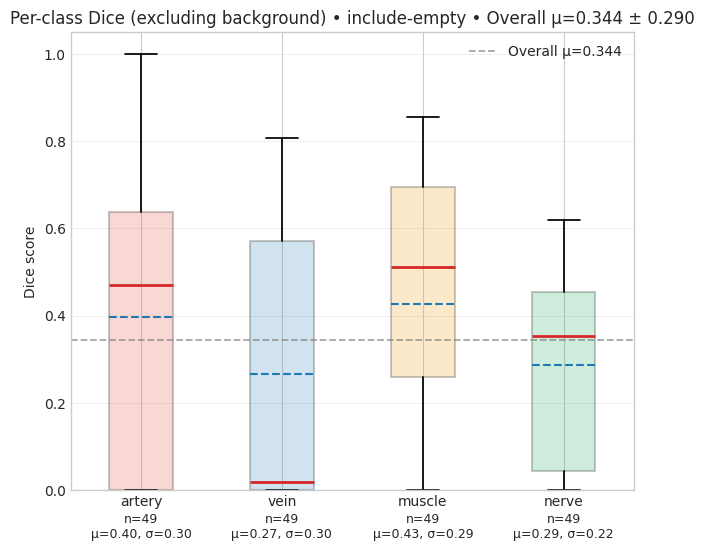

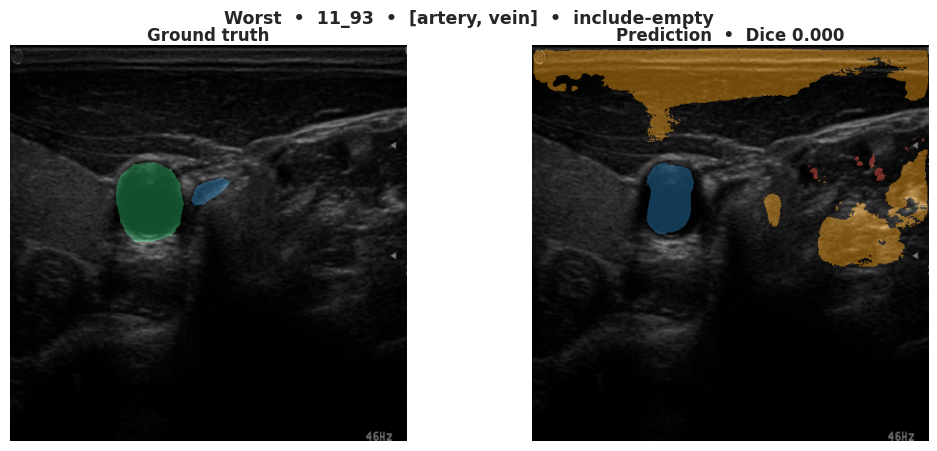

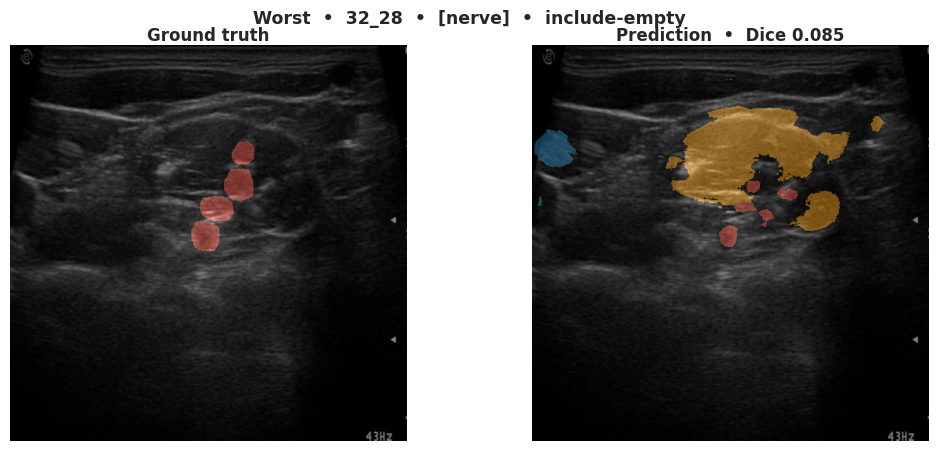

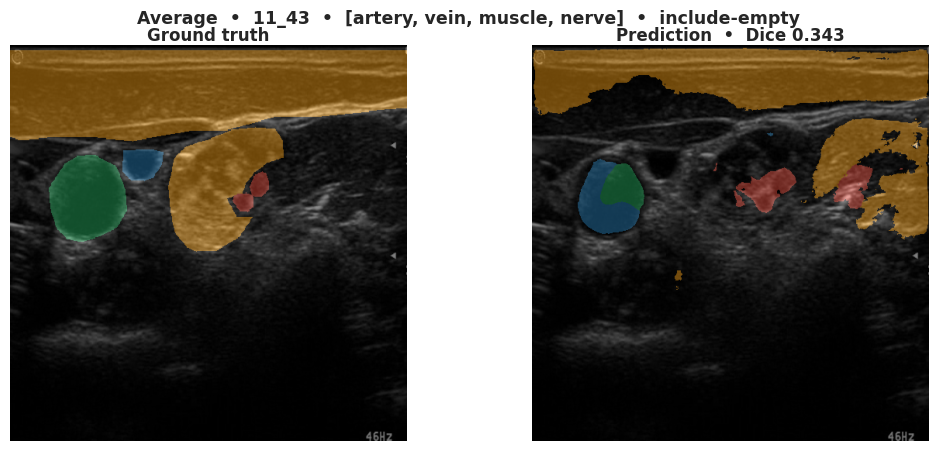

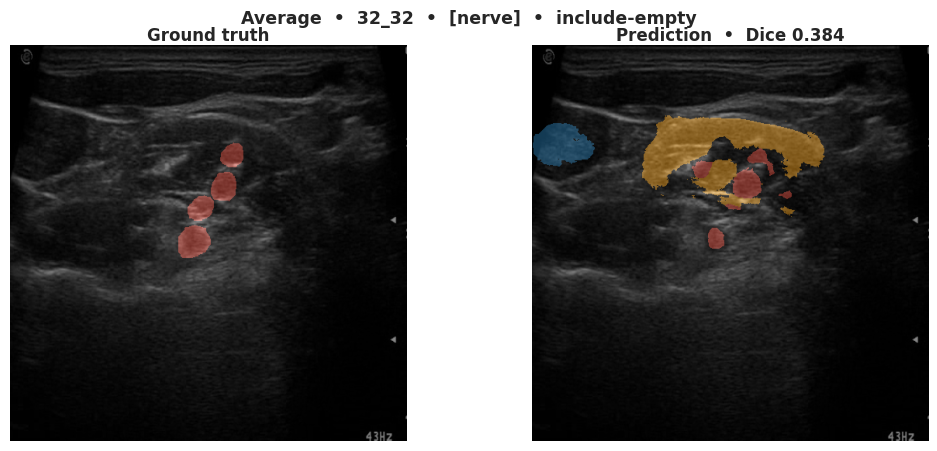

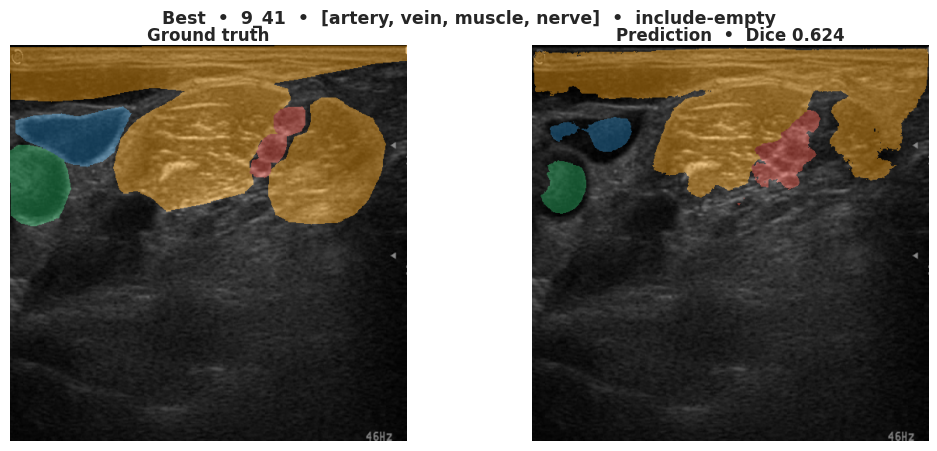

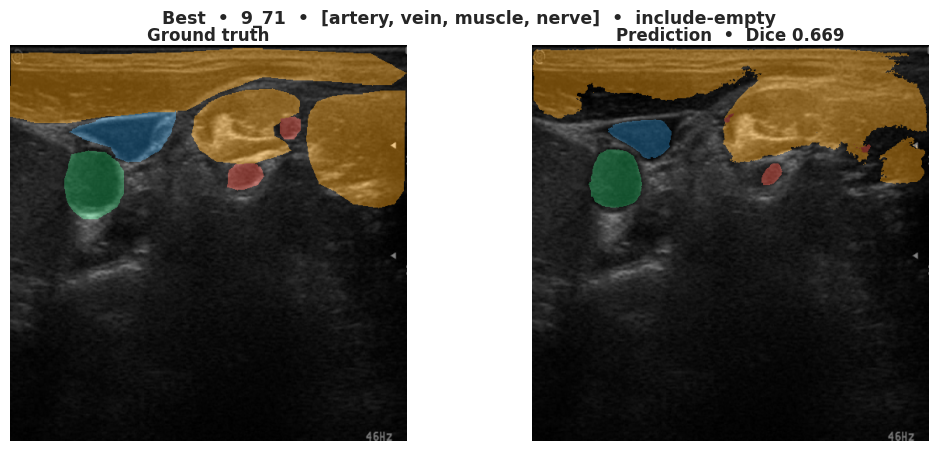


📂 Fold 3/5
  Train patient IDs: [16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 39, 23, 40, 22, 18, 28, 20, 12, 42, 7, 19, 13, 44]
  Val   patient IDs: [43, 29, 15, 14, 38, 31]

Train landmarks stat: 
Artery  present: 180/253 images
Vein    present: 197/253 images
Muscle  present: 241/253 images
Nerve   present: 230/253 images

Validation landmarks stat:
Artery  present: 28/59 images
Vein    present: 28/59 images
Muscle  present: 58/59 images
Nerve   present: 54/59 images


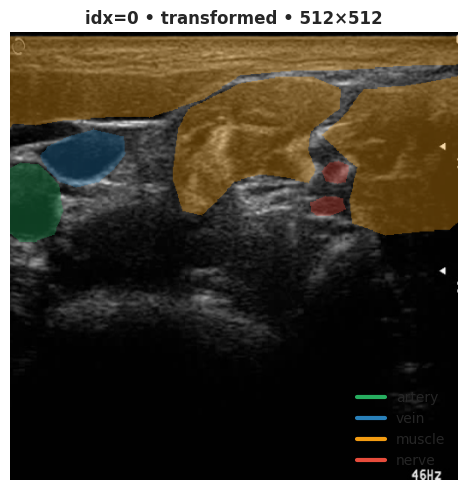

Epoch 001/100 | lr=1.000e-03 train_loss=1.0427 val_loss=0.8543 train_dice=0.1095 val_dice=0.0057 [BEST] (patience 0/20)
Epoch 002/100 | lr=1.000e-03 train_loss=0.6608 val_loss=0.6787 train_dice=0.1518 val_dice=0.1495 [BEST] (patience 0/20)
Epoch 003/100 | lr=1.000e-03 train_loss=0.5565 val_loss=0.5449 train_dice=0.2298 val_dice=0.1558 [BEST] (patience 0/20)
Epoch 004/100 | lr=1.000e-03 train_loss=0.4827 val_loss=0.5259 train_dice=0.2314 val_dice=0.3112 [BEST] (patience 0/20)
Epoch 005/100 | lr=1.000e-03 train_loss=0.4212 val_loss=0.4582 train_dice=0.3082 val_dice=0.3016 [BEST] (patience 0/20)
Epoch 006/100 | lr=1.000e-03 train_loss=0.3869 val_loss=0.4266 train_dice=0.3098 val_dice=0.2844 [BEST] (patience 0/20)
Epoch 007/100 | lr=1.000e-03 train_loss=0.3562 val_loss=0.4618 train_dice=0.2946 val_dice=0.2636  (patience 1/20)
Epoch 008/100 | lr=1.000e-03 train_loss=0.3406 val_loss=0.4491 train_dice=0.3280 val_dice=0.2270  (patience 2/20)
Epoch 009/100 | lr=1.000e-03 train_loss=0.3171 val_l

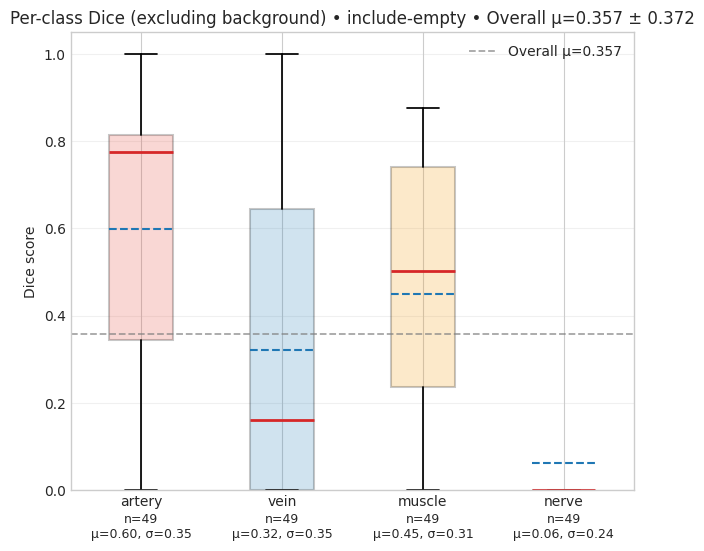

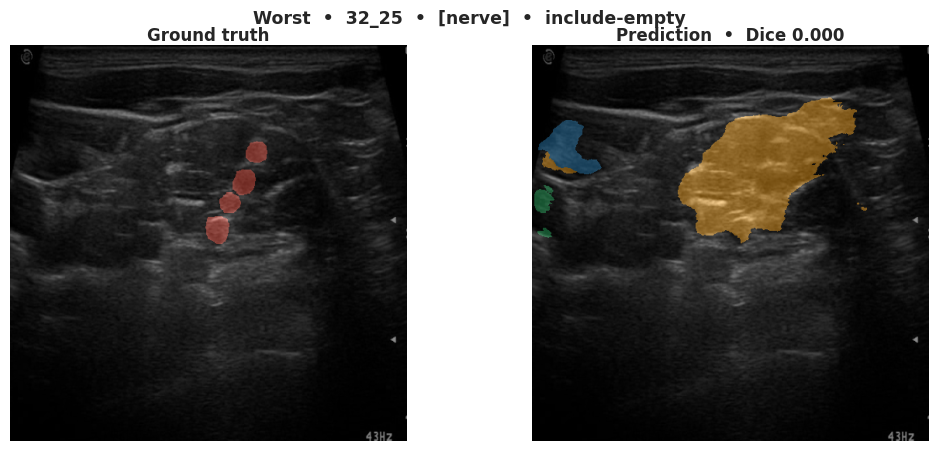

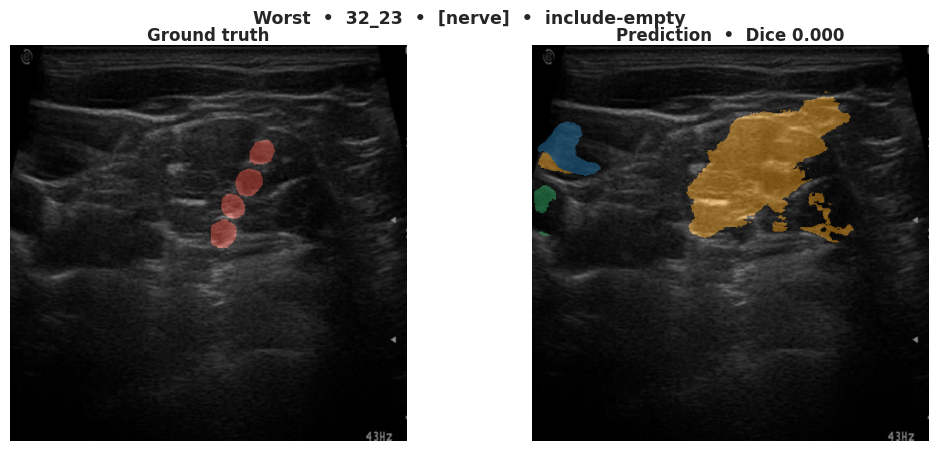

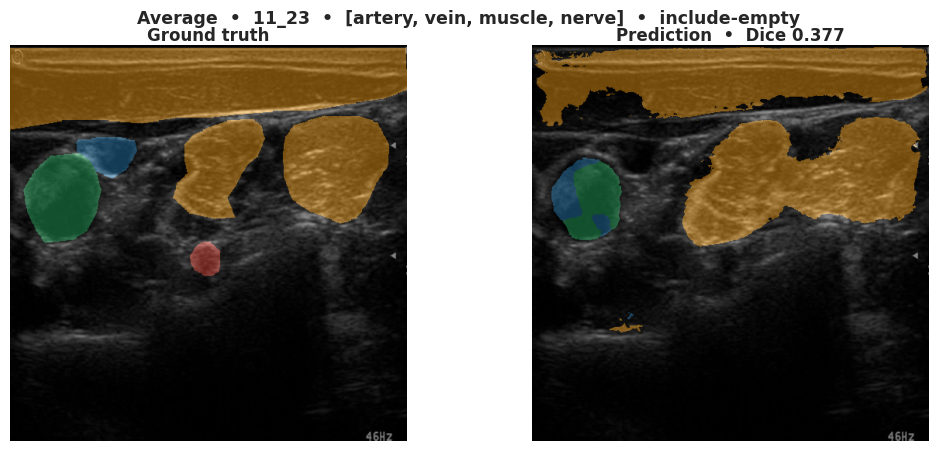

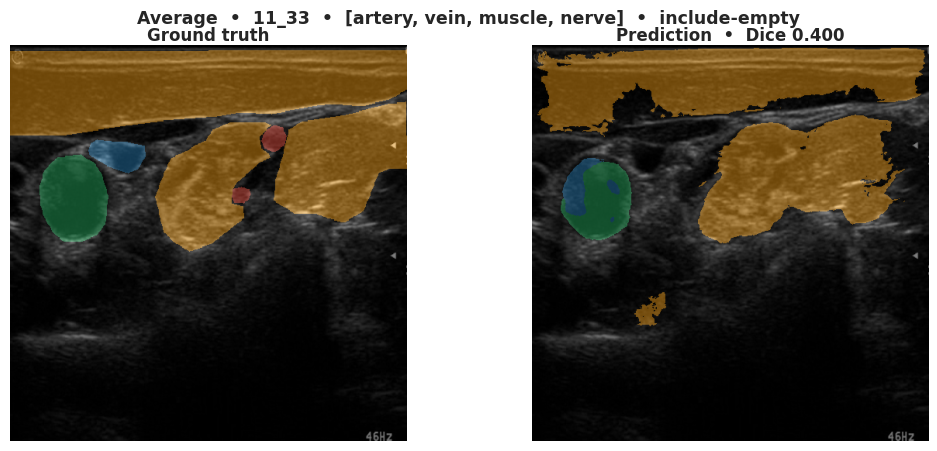

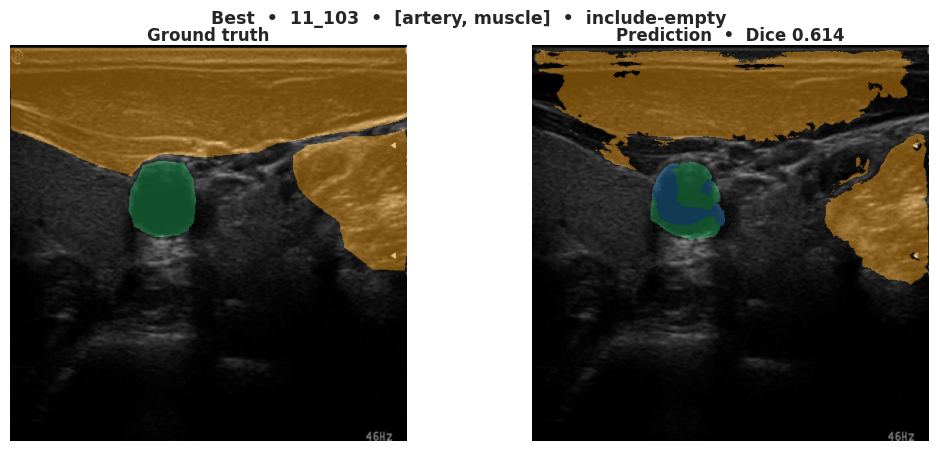

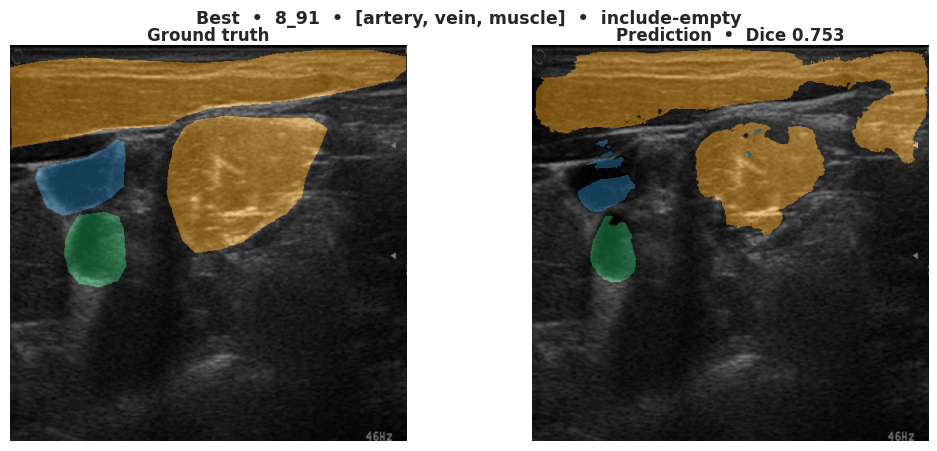


📂 Fold 4/5
  Train patient IDs: [16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 20, 12, 42, 7, 19, 13, 44]
  Val   patient IDs: [39, 23, 40, 22, 18, 28]

Train landmarks stat: 
Artery  present: 176/251 images
Vein    present: 176/251 images
Muscle  present: 238/251 images
Nerve   present: 229/251 images

Validation landmarks stat:
Artery  present: 32/61 images
Vein    present: 49/61 images
Muscle  present: 61/61 images
Nerve   present: 55/61 images


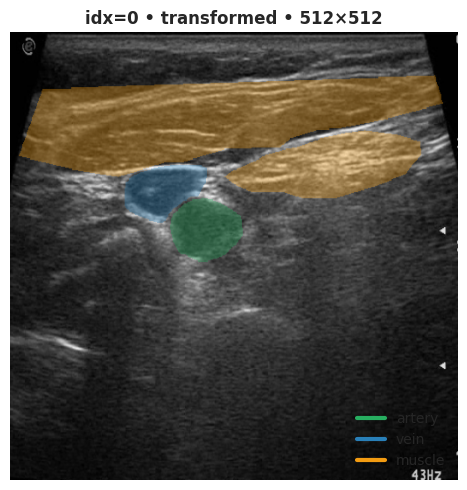

Epoch 001/100 | lr=1.000e-03 train_loss=1.0553 val_loss=2.5133 train_dice=0.1176 val_dice=0.0076 [BEST] (patience 0/20)
Epoch 002/100 | lr=1.000e-03 train_loss=0.6295 val_loss=0.6065 train_dice=0.1508 val_dice=0.0051 [BEST] (patience 0/20)
Epoch 003/100 | lr=1.000e-03 train_loss=0.5191 val_loss=0.5434 train_dice=0.2016 val_dice=0.0143 [BEST] (patience 0/20)
Epoch 004/100 | lr=1.000e-03 train_loss=0.4562 val_loss=0.4991 train_dice=0.2158 val_dice=0.0601 [BEST] (patience 0/20)
Epoch 005/100 | lr=1.000e-03 train_loss=0.4158 val_loss=0.4361 train_dice=0.2789 val_dice=0.1223 [BEST] (patience 0/20)
Epoch 006/100 | lr=1.000e-03 train_loss=0.3846 val_loss=0.4529 train_dice=0.3167 val_dice=0.1836  (patience 1/20)
Epoch 007/100 | lr=1.000e-03 train_loss=0.3556 val_loss=0.3658 train_dice=0.3637 val_dice=0.2228 [BEST] (patience 0/20)
Epoch 008/100 | lr=1.000e-03 train_loss=0.3439 val_loss=0.3585 train_dice=0.3801 val_dice=0.3060 [BEST] (patience 0/20)
Epoch 009/100 | lr=1.000e-03 train_loss=0.3333

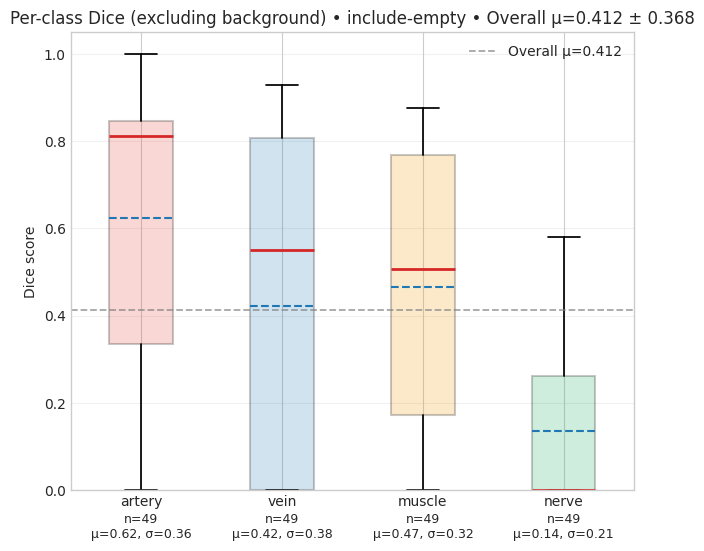

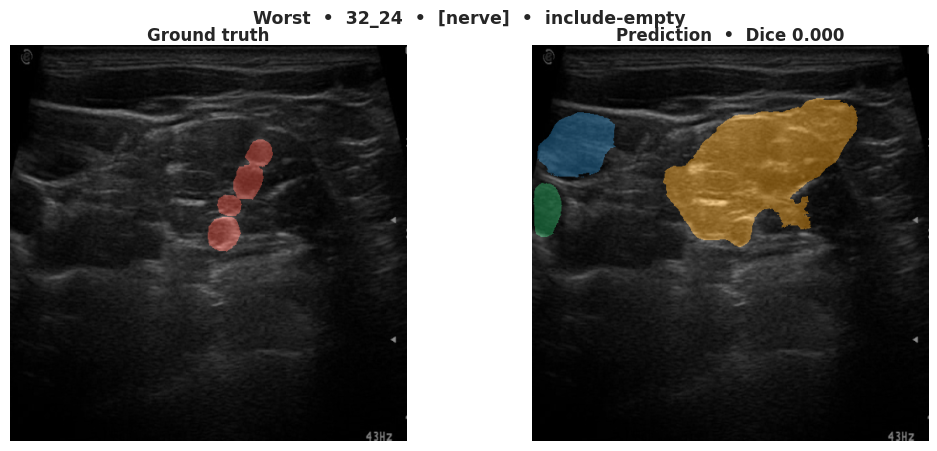

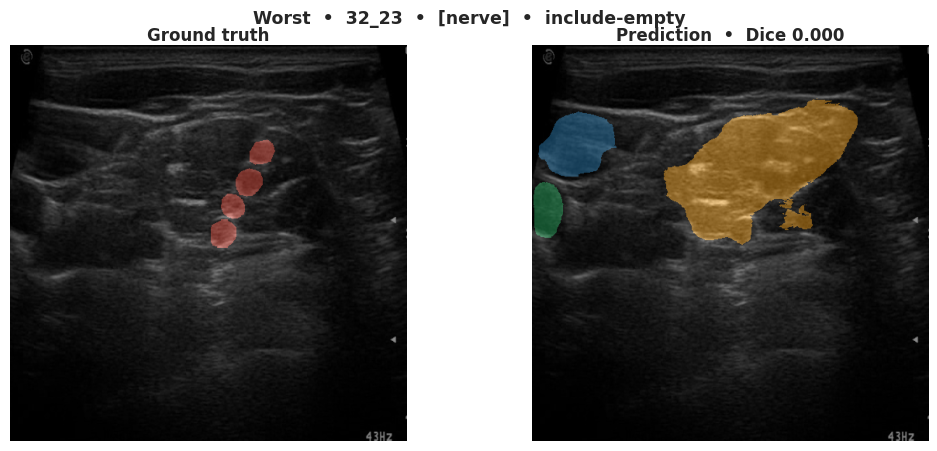

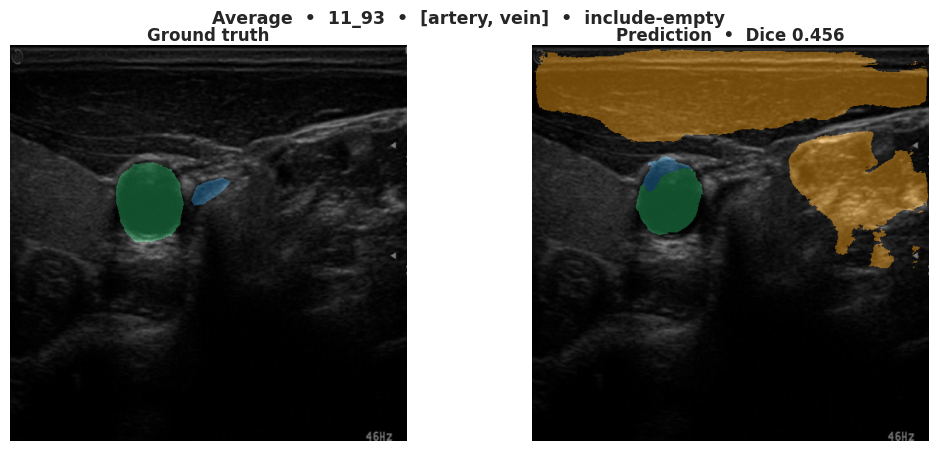

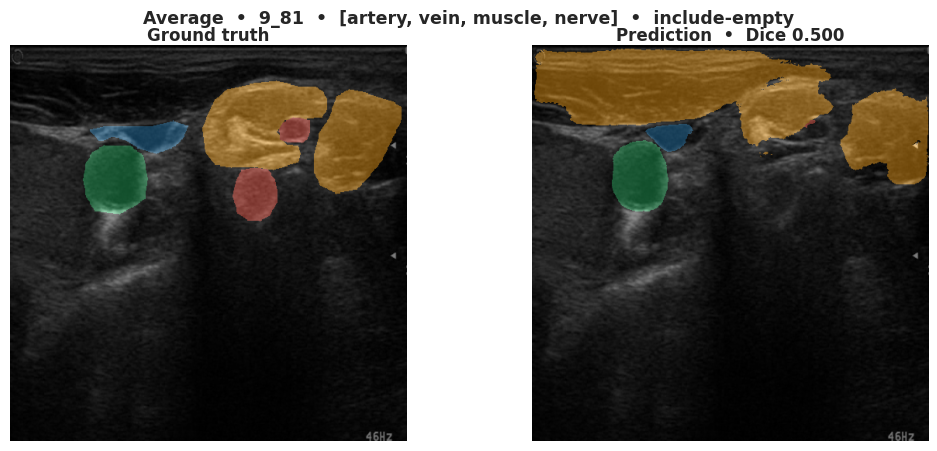

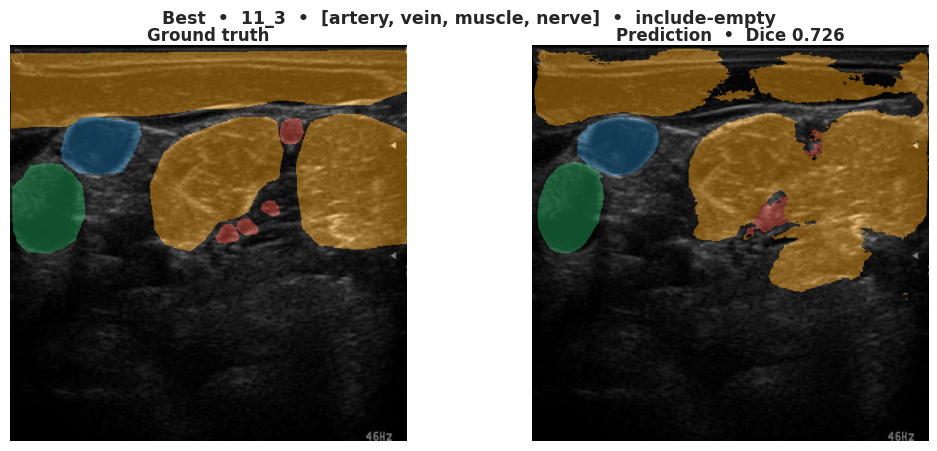

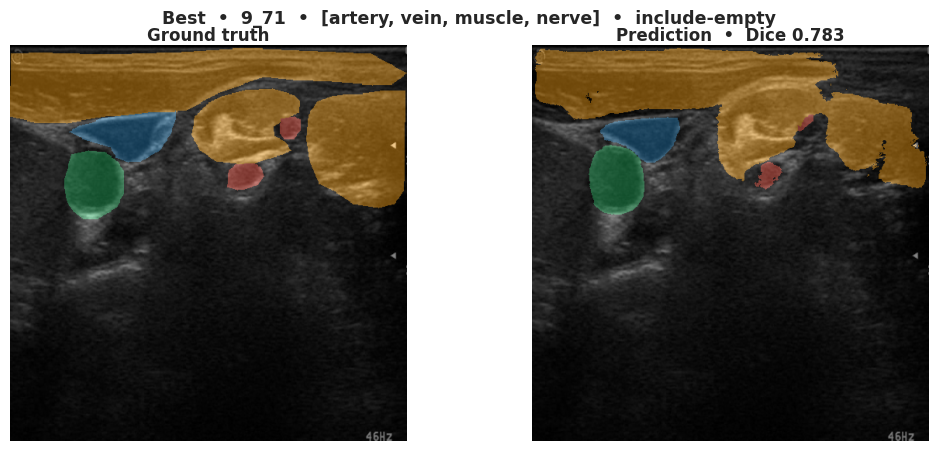


📂 Fold 5/5
  Train patient IDs: [16, 37, 34, 36, 24, 10, 17, 30, 25, 41, 21, 27, 43, 29, 15, 14, 38, 31, 39, 23, 40, 22, 18, 28]
  Val   patient IDs: [20, 12, 42, 7, 19, 13, 44]

Train landmarks stat: 
Artery  present: 138/235 images
Vein    present: 148/235 images
Muscle  present: 222/235 images
Nerve   present: 213/235 images

Validation landmarks stat:
Artery  present: 70/77 images
Vein    present: 77/77 images
Muscle  present: 77/77 images
Nerve   present: 71/77 images


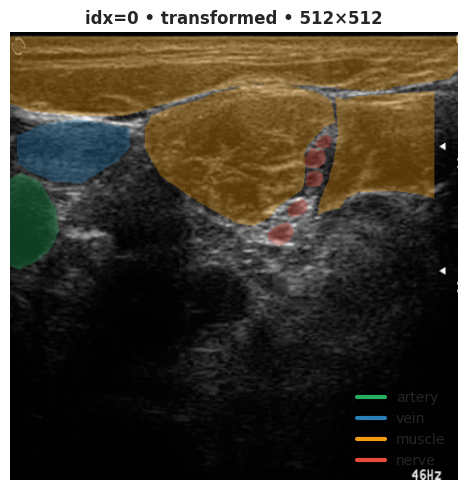

Epoch 001/100 | lr=1.000e-03 train_loss=1.2984 val_loss=2.6839 train_dice=0.0941 val_dice=0.0528 [BEST] (patience 0/20)
Epoch 002/100 | lr=1.000e-03 train_loss=0.7644 val_loss=1.2667 train_dice=0.1368 val_dice=0.1238 [BEST] (patience 0/20)
Epoch 003/100 | lr=1.000e-03 train_loss=0.6075 val_loss=0.6732 train_dice=0.2159 val_dice=0.0620 [BEST] (patience 0/20)
Epoch 004/100 | lr=1.000e-03 train_loss=0.5204 val_loss=0.7269 train_dice=0.2298 val_dice=0.1490  (patience 1/20)
Epoch 005/100 | lr=1.000e-03 train_loss=0.4579 val_loss=0.5888 train_dice=0.2836 val_dice=0.1150 [BEST] (patience 0/20)
Epoch 006/100 | lr=1.000e-03 train_loss=0.4060 val_loss=0.5829 train_dice=0.3127 val_dice=0.1199 [BEST] (patience 0/20)
Epoch 007/100 | lr=1.000e-03 train_loss=0.3844 val_loss=1.4196 train_dice=0.3148 val_dice=0.1803  (patience 1/20)
Epoch 008/100 | lr=1.000e-03 train_loss=0.3580 val_loss=0.5524 train_dice=0.3293 val_dice=0.2704 [BEST] (patience 0/20)
Epoch 009/100 | lr=1.000e-03 train_loss=0.3310 val_l

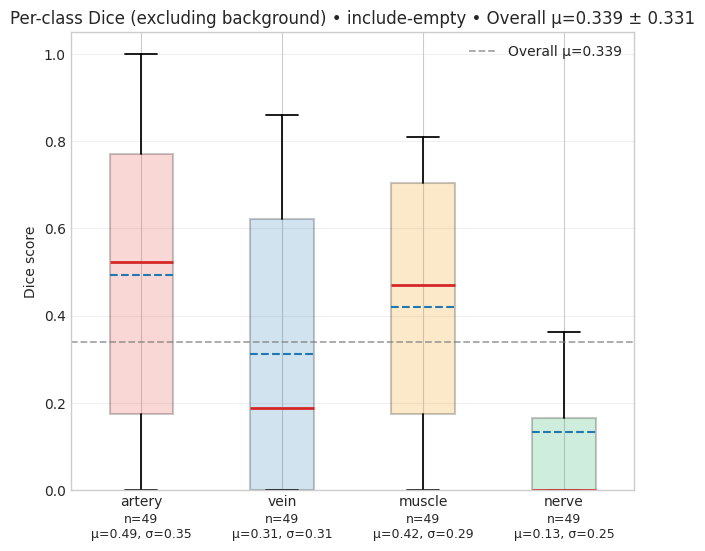

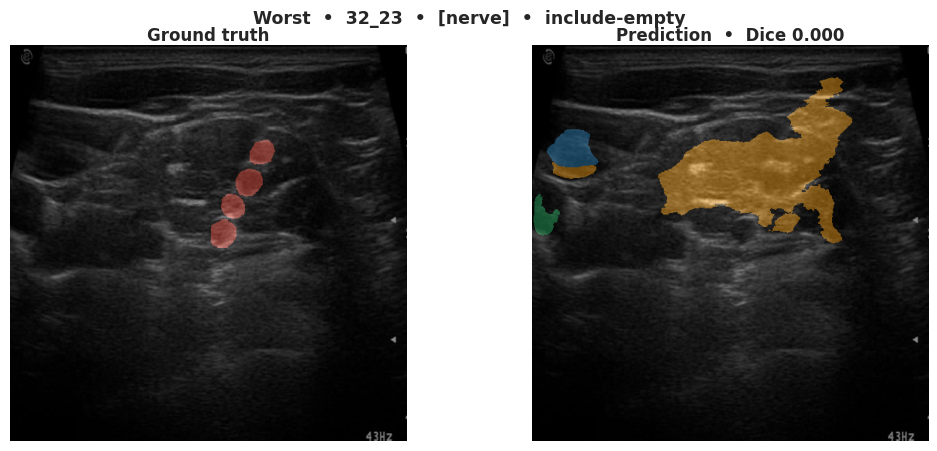

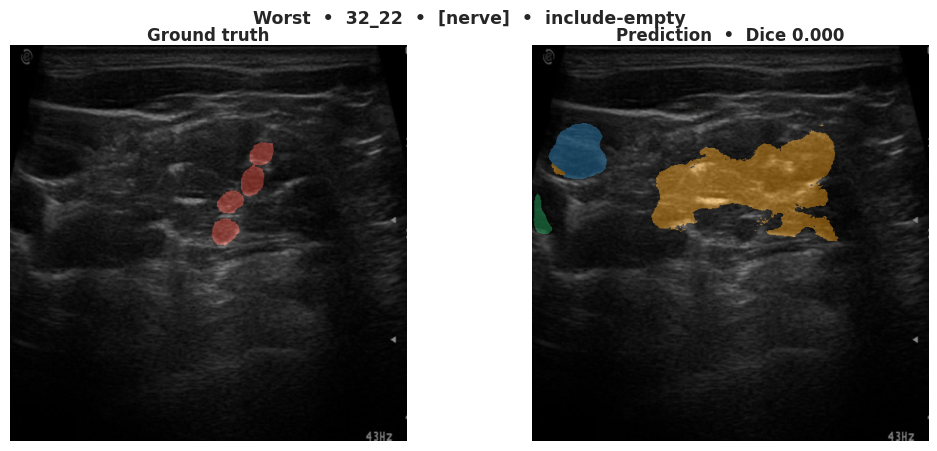

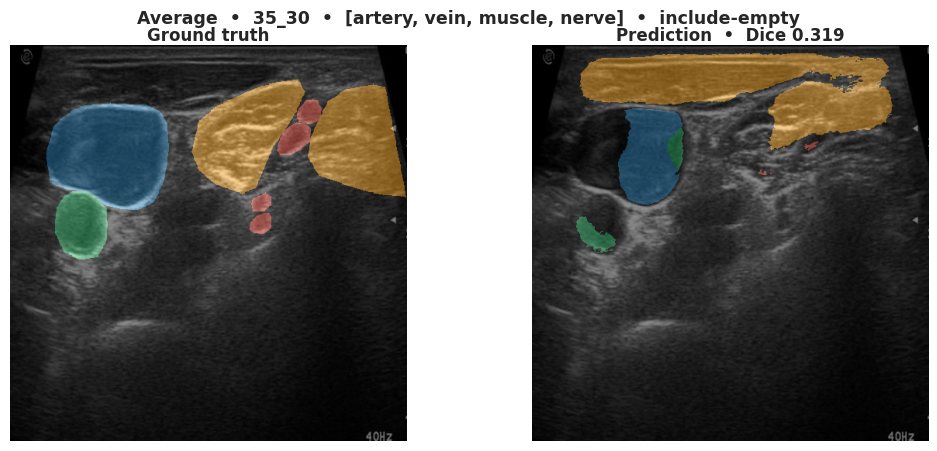

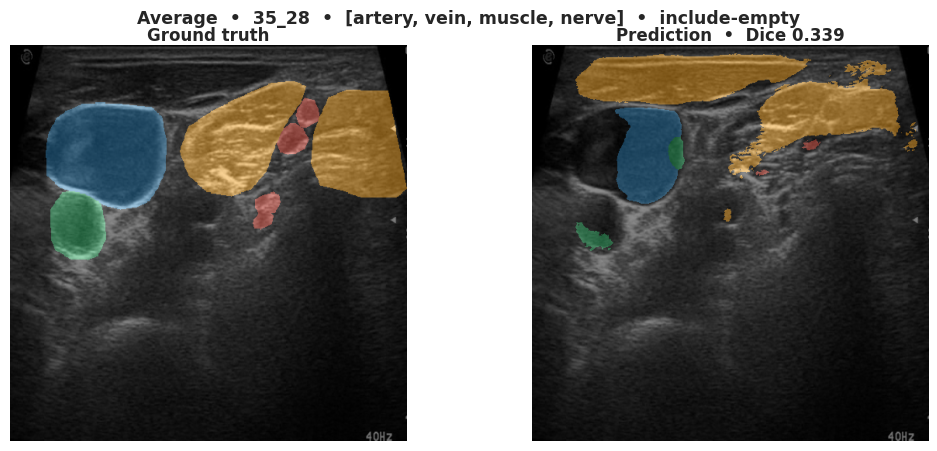

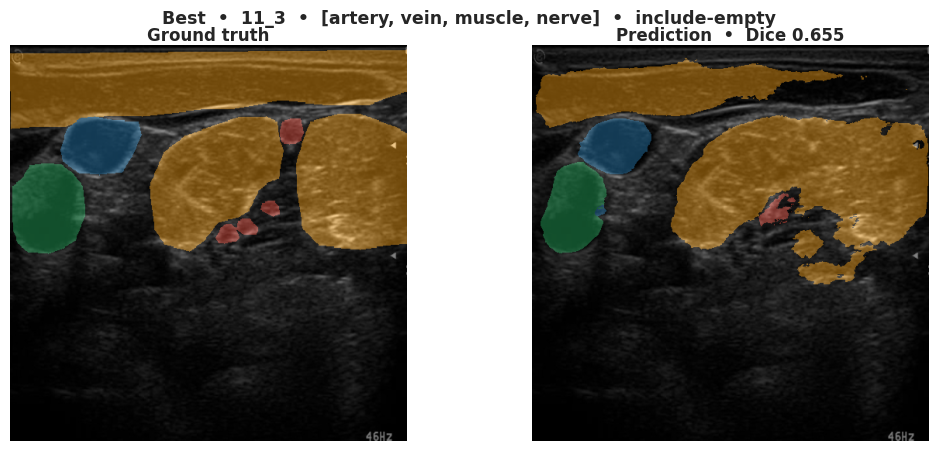

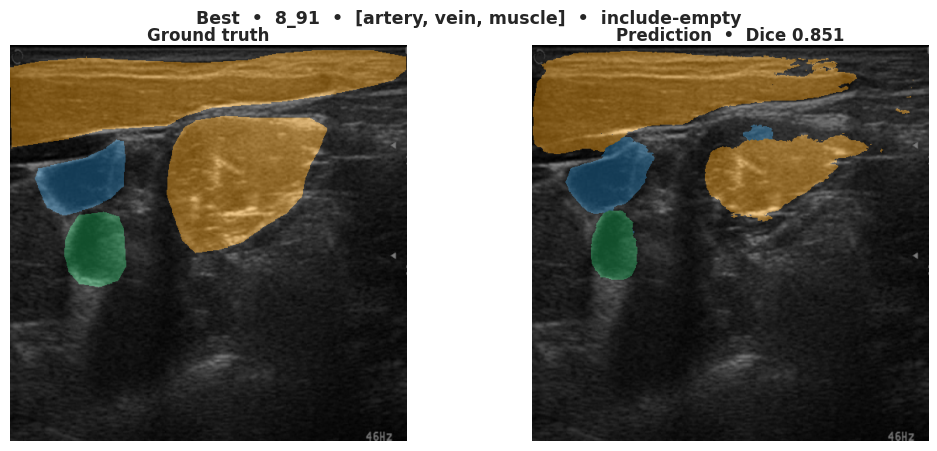


🎯 Average overall Dice across folds: 0.3601 ± 0.0266  (n=5)

📌 Per-landmark average Dice across folds:
  1: dongmai (artery)     mean±std: 0.5237 ± 0.0812  (folds=5)
  2: jingmai (vein)       mean±std: 0.3365 ± 0.0524  (folds=5)
  3: jirouzuzhi (muscle)  mean±std: 0.4447 ± 0.0193  (folds=5)
  4: shenjing (nerve)     mean±std: 0.1357 ± 0.0826  (folds=5)

✅ Experiment complete across folds.


In [38]:
res = experiment(variants, exp_id=101114, seed=seed)